In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


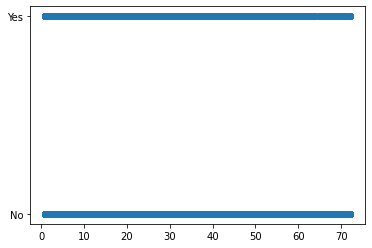

In [51]:
plt.scatter(df.tenure,df.Churn)

In [3]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6014,0956-ACVZC,Female,0,No,No,54,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),94.1,5060.9,No
2049,1170-SASML,Female,0,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.4,5869.4,No
24,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.6,2970.3,No


In [4]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [5]:
df.TotalCharges.dtype

dtype('float64')

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
def cat_values(x):
    for i in x:
        if x[i].dtype=='object':
            print(f'{i}:{df[i].unique()}')

In [8]:
cat_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [9]:
df.replace(['No phone service','No internet service'],'No',inplace=True)

In [10]:
cat_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [11]:
df.isna().sum().sum()

11

In [12]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum().sum()

0

In [15]:
corr=df.corr()

<AxesSubplot:>

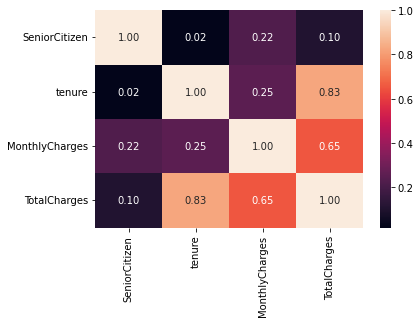

In [16]:
sns.heatmap(corr,annot=True,fmt='.2f')

<AxesSubplot:xlabel='MonthlyCharges'>

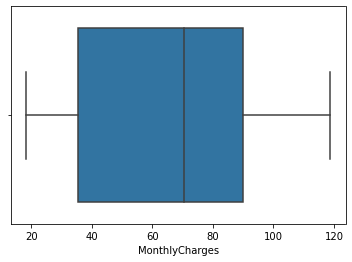

In [17]:
sns.boxplot(df.MonthlyCharges)

<AxesSubplot:xlabel='TotalCharges'>

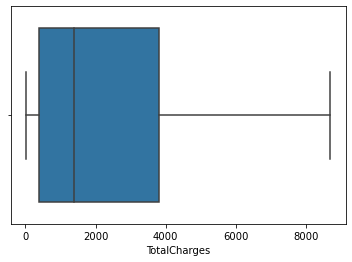

In [18]:
sns.boxplot(df.TotalCharges)

In [19]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [20]:
X[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [21]:
y[:2]

0    No
1    No
Name: Churn, dtype: object

In [22]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=60)

In [24]:
X_train[:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5110,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.50,632.20
5637,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15
1891,Female,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.10,45.10


In [25]:
X_train.shape,X_test.shape

((5625, 19), (1407, 19))

In [26]:
y_train.shape,y_test.shape

((5625,), (1407,))

In [27]:
cat_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [28]:
ohe=OneHotEncoder(drop='first',sparse=False)

In [29]:
X_train_encoded=ohe.fit_transform(X_train[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

In [30]:
X_test_encoded=ohe.transform(X_test[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

In [31]:
X_train_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [32]:
X_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [33]:
X_train.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],axis=1,inplace=True)
X_test.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],axis=1,inplace=True)

In [34]:
X_train_final=np.hstack((X_train,X_train_encoded))
X_test_final=np.hstack((X_test,X_test_encoded))

In [35]:
X_train_final

array([[ 0.  ,  8.  , 73.5 , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 64.  , 90.25, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 45.1 , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 0.  ,  7.  , 35.5 , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , 19.8 , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  , 56.  , 52.7 , ...,  0.  ,  0.  ,  1.  ]])

In [36]:
X_test_final

array([[  0.  ,   3.  ,  35.2 , ...,   1.  ,   0.  ,   0.  ],
       [  0.  ,  37.  ,  96.1 , ...,   1.  ,   0.  ,   0.  ],
       [  0.  ,   4.  ,  90.05, ...,   0.  ,   1.  ,   0.  ],
       ...,
       [  0.  ,   1.  ,  94.6 , ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  72.  , 114.05, ...,   1.  ,   0.  ,   0.  ],
       [  0.  ,  10.  ,  85.25, ...,   0.  ,   1.  ,   0.  ]])

In [37]:
le=LabelEncoder()

In [38]:
y_train=le.fit_transform(y_train)

In [39]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [40]:
y_test=le.transform(y_test)

In [41]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [42]:
X_train_final.shape,y_train.shape

((5625, 23), (5625,))

In [43]:
X_test_final.shape,y_test.shape

((1407, 23), (1407,))

In [44]:
scaler= MinMaxScaler()

In [45]:
X_train_scaled=scaler.fit_transform(X_train_final)
X_test_scaled=scaler.transform(X_test_final)

In [46]:
X_train_scaled

array([[0.        , 0.09859155, 0.54975124, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.88732394, 0.71641791, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.26716418, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.08450704, 0.17164179, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01542289, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.77464789, 0.34278607, ..., 0.        , 0.        ,
        1.        ]])

In [47]:
sm=SMOTE()

In [48]:
X_train_scaled.shape,y_train.shape

((5625, 23), (5625,))

In [49]:
X_train_scaled,y_train=sm.fit_resample(X_train_scaled,y_train)
X_test_scaled,y_test=sm.fit_resample(X_test_scaled,y_test)

In [52]:
log_classifier=LogisticRegression()

In [53]:
log_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [54]:
y_pred=log_classifier.predict(X_test_scaled)

In [55]:
y_pred[:5]

array([1, 1, 1, 0, 1])

In [56]:
y_test[:5]

array([1, 0, 1, 0, 0])

In [58]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[757 285]
 [179 863]]


<AxesSubplot:>

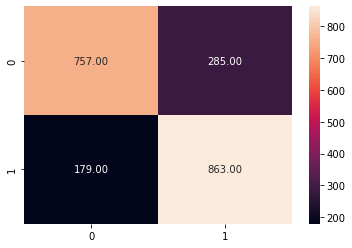

In [59]:
sns.heatmap(cm,annot=True,fmt='.2f')

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1042
           1       0.75      0.83      0.79      1042

    accuracy                           0.78      2084
   macro avg       0.78      0.78      0.78      2084
weighted avg       0.78      0.78      0.78      2084



In [66]:
accuracy=(757+863)/(757+285+179+863)
np.round(accuracy,2)

0.78

In [78]:
precision_0=(757)/(757+179)
np.round(precision_0,2)

0.81

In [79]:
precision_1=(868)/(863+285)
np.round(precision_1,2)

0.76

In [81]:
recall_0=(757)/(757+285)
np.round(recall_0,2)

0.73

In [82]:
recall_1=(863)/(863+179)
np.round(recall_1,2)

0.83

In [84]:
f1_score_0=2*((0.81*0.73)/(0.81+0.73))
np.round(f1_score_0,2)

0.77

In [85]:
f1_score_1=2*((0.76*0.83)/(0.76+0.83))
np.round(f1_score_1,2)

0.79

In [86]:
log_classifier.score(X_train_scaled,y_train)

0.7789371511768988

In [87]:
log_classifier.score(X_test_scaled,y_test)

0.7773512476007678

# ANN

In [90]:
X_train_scaled.shape

(8242, 23)

In [91]:
model=keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
258/258 [==============================] - 7s 3ms/step - loss: 0.5612 - accuracy: 0.7197
Epoch 2/5
258/258 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7755
Epoch 3/5
258/258 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.7781
Epoch 4/5
258/258 [==============================] - 1s 3ms/step - loss: 0.4663 - accuracy: 0.7806
Epoch 5/5
258/258 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7794


In [92]:
model.evaluate(X_test_scaled,y_test)

66/66 [==============================] - 1s 4ms/step - loss: 0.4755 - accuracy: 0.7649


[0.47547170519828796, 0.7648752331733704]